<a href="https://colab.research.google.com/github/Rociolivingstonux/Challenge-Data-Science-Alura-/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


In [4]:
todas_las_tiendas.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')

#1. Análisis de facturación



Análisis de facturación por tienda.


In [5]:
facturacion_por_tienda = todas_las_tiendas.groupby("Tienda")["Precio"].sum()
print(facturacion_por_tienda)

Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


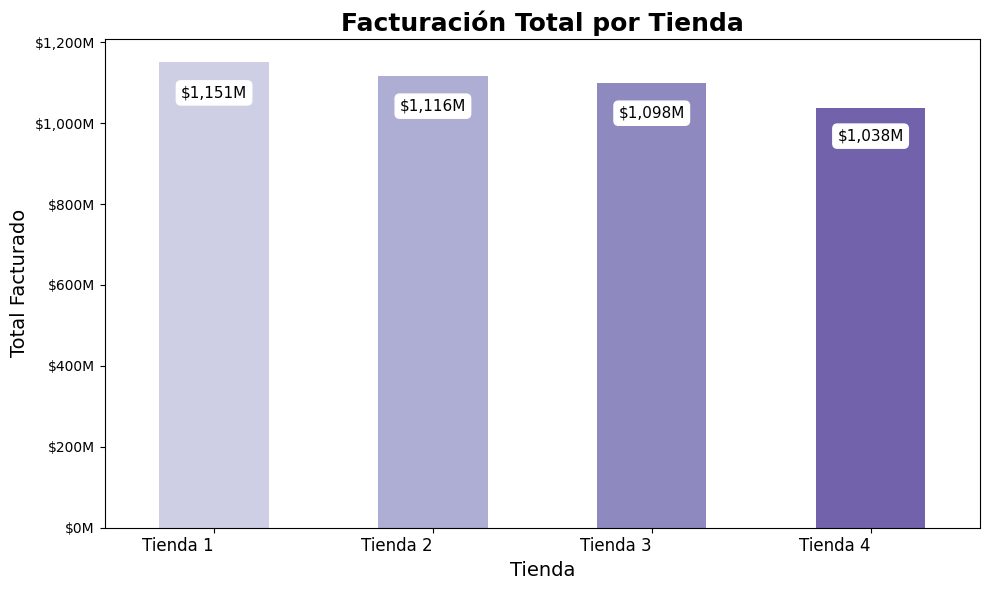

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Datos agrupados por tienda
facturacion_por_tienda = todas_las_tiendas.groupby("Tienda")["Precio"].sum()

# Función para convertir números a millones con formato
def millones(x, pos=None):
    """
    Esta función convierte un número y le da formato de millones (M) sin decimales
    """
    return f'${x/1_000_000:,.0f}M'

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Generar una paleta de colores lilas
colores_lilas = plt.cm.Purples(np.linspace(0.3, 0.7, len(facturacion_por_tienda)))

# Establecer las barras con colores diferentes para cada tienda
ax = facturacion_por_tienda.plot(
    kind="bar",
    color=colores_lilas,
    edgecolor="none"  # Eliminar bordes
)

# Título estilizado
plt.title("Facturación Total por Tienda", fontsize=18, fontweight="bold", color="black")

# Etiquetas de ejes
plt.ylabel("Total Facturado", fontsize=14, color="black")
plt.xlabel("Tienda", fontsize=14, color="black")

# Mejorar la legibilidad del eje X
plt.xticks(rotation=0, ha="right", fontsize=12)

# Aplicar formato en el eje Y usando la función millones
ax.yaxis.set_major_formatter(mtick.FuncFormatter(millones))

# Agregar etiquetas dentro de cada barra (cerca del final) con borde
for i, valor in enumerate(facturacion_por_tienda):
    ax.text(
        i, valor * 0.95,  # Posición dentro de la barra (95% del alto)
        f'${valor/1_000_000:,.0f}M',
        ha='center', va='top',
        fontsize=11, color='black',
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3')
    )


# Ajustar diseño
plt.tight_layout()
plt.show()





# 2. Ventas por categoría


In [10]:
ventas_por_categoria = todas_las_tiendas.groupby(["Tienda", "Categoría del Producto"])["Precio"].sum().unstack()

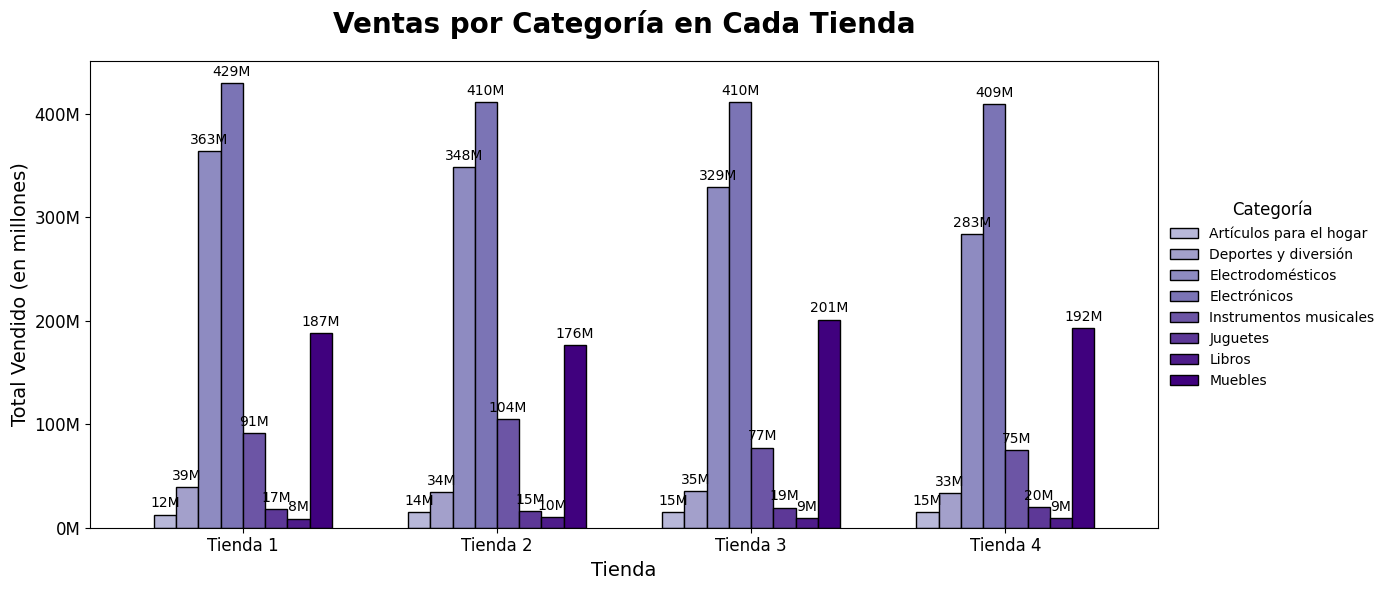

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(14, 6))

# Paleta lila (Purples)
colores = plt.cm.Purples(
    range(100, 256, int(155 / (len(ventas_por_categoria.columns)-1)))
)

# Gráfico
barras = ventas_por_categoria.plot(
    kind="bar",
    ax=ax,
    edgecolor="black",
    color=colores,
    width=0.7
)

# Títulos y ejes
ax.set_title("Ventas por Categoría en Cada Tienda", fontsize=20, fontweight="bold", color="black", pad=20)
ax.set_ylabel("Total Vendido (en millones)", fontsize=14)
ax.set_xlabel("Tienda", fontsize=14)

# Estilo
ax.set_xticklabels(ventas_por_categoria.index, rotation=0, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Eje Y en millones sin decimales
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

# Etiquetas de valor arriba de cada barra
for container in barras.containers:
    ax.bar_label(container, labels=[f'{int(v/1e6)}M' if v > 0 else '' for v in container.datavalues],
                 label_type='edge', fontsize=10, padding=3, color="black")

# Leyenda prolija
ax.legend(title="Categoría", title_fontsize=12, fontsize=10,
          loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

plt.tight_layout()
plt.show()





# 3. Calificación promedio de la tienda





In [ ]:
from matplotlib import pyplot as plt


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda